In [2]:
import numpy as np

z = np.arange(-10, 10, 0.01)
g = 1 / (1 + np.exp(-z)) # 시그모이드 함수

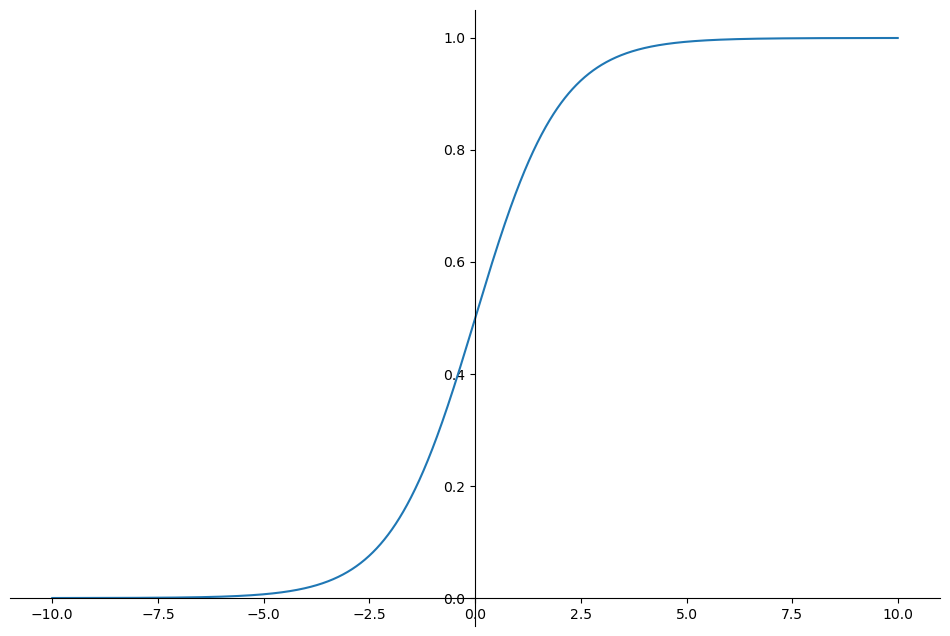

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
ax = plt.gca()

ax.plot(z, g)
ax.spines['left'].set_position(('zero'))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('zero'))
ax.spines['top'].set_color('none')

plt.show()

## Cost function

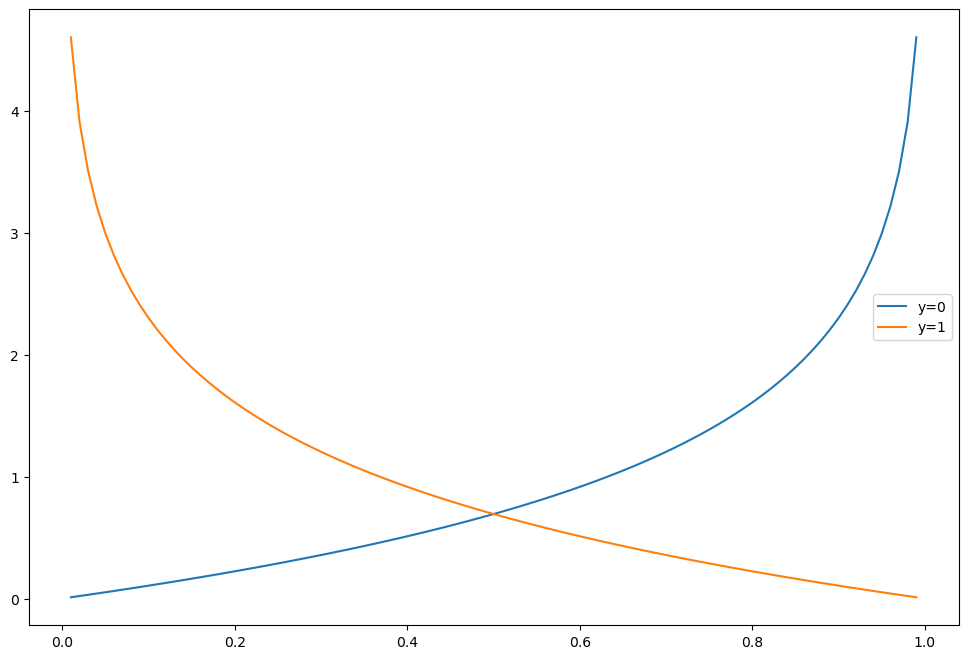

In [4]:
h = np.arange(0.01, 1, 0.01)

c0 = - np.log(1-h)
c1 =  - np.log(h)

plt.figure(figsize=(12, 8))
plt.plot(h, c0, label='y=0')
plt.plot(h, c1, label='y=1')
plt.legend()

plt.show()

## 예제 - 와인 분류기

In [5]:
import pandas as pd

wine_url = 'https://github.com/PinkWink/ML_tutorial/raw/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
wine['taste'] = np.where(wine['quality'] > 5, 1, 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


In [7]:
X = wine.drop(['quality', 'taste'], axis=1)
y = wine['taste']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred = lr.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred))


Train ACC :  0.7425437752549547
Test ACC :  0.7438461538461538


### 파이프라인

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

estimators = [('scaler', StandardScaler()), ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe = Pipeline(estimators)

In [11]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [12]:
y_pred_tr = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred))

Train ACC :  0.7444679622859341
Test ACC :  0.7469230769230769


### DT와의 비교

In [13]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [14]:
models = {
    'Logistice Regression': pipe, 
    'Decision Tree': wine_tree
}

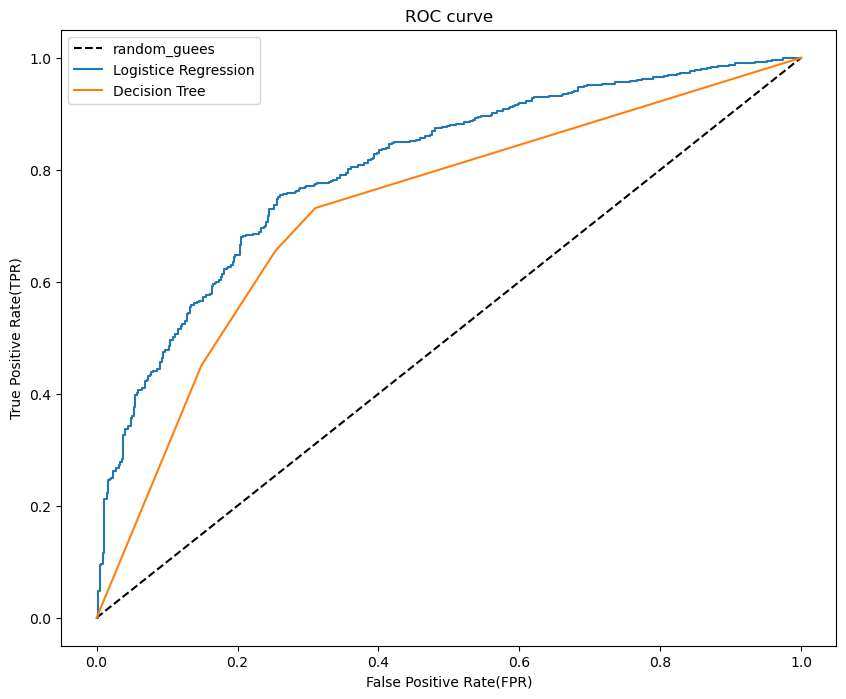

In [15]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='random_guees')

for name, model in models.items():
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=name)

plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()

## 예제 - PIMA 인디언 당뇨병 예측

In [16]:
pima_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'
pima = pd.read_csv(pima_url, sep=',')
pima.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
pima = pima.astype('float')

In [19]:
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


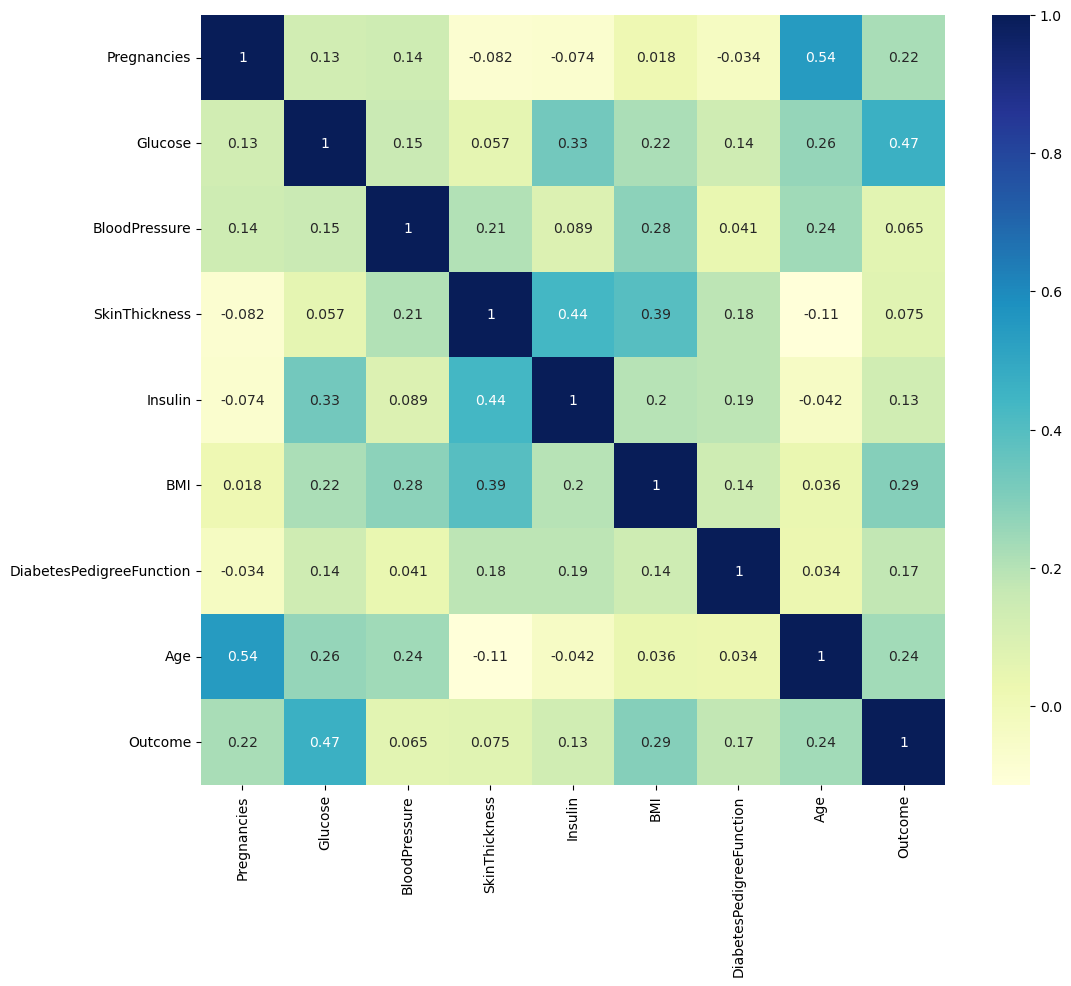

In [22]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(pima.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [23]:
# 이상 데이터 탐색
(pima==0).astype('int').sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [24]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
pima[zero_features] = pima[zero_features].replace(0, pima[zero_features].mean())
(pima==0).astype('int').sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [25]:
X = pima.drop('Outcome', axis=1)
y = pima['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy : ', round(accuracy_score(y_test, pred), 4))
print('Recall : ', round(recall_score(y_test, pred), 4))
print('Precision : ', round(precision_score(y_test, pred), 4))
print('F1 score : ', round(f1_score(y_test, pred), 4))
print('AUC score : ', round(roc_auc_score(y_test, pred), 4))

Accuracy :  0.7727
Recall :  0.6111
Precision :  0.7021
F1 score :  0.6535
AUC score :  0.7356


In [31]:
coeffs = pipe_lr.named_steps['clf'].coef_

for feature, coef in zip(X_train.columns, coeffs[0]):
    print(feature, ':', round(coef, 3))

Pregnancies : 0.354
Glucose : 1.201
BloodPressure : -0.158
SkinThickness : 0.034
Insulin : -0.163
BMI : 0.62
DiabetesPedigreeFunction : 0.367
Age : 0.172


In [60]:
data = {feature: coef for feature, coef in zip(X_train.columns, pipe_lr.named_steps['clf'].coef_[0])}
features = pd.DataFrame(list(data.items()), columns=['features', 'importance'])
features

,features,importance
0,Pregnancies,0.354266
1,Glucose,1.201424
2,BloodPressure,-0.158401
3,SkinThickness,0.033947
4,Insulin,-0.162865
5,BMI,0.620405
6,DiabetesPedigreeFunction,0.366694
7,Age,0.171960


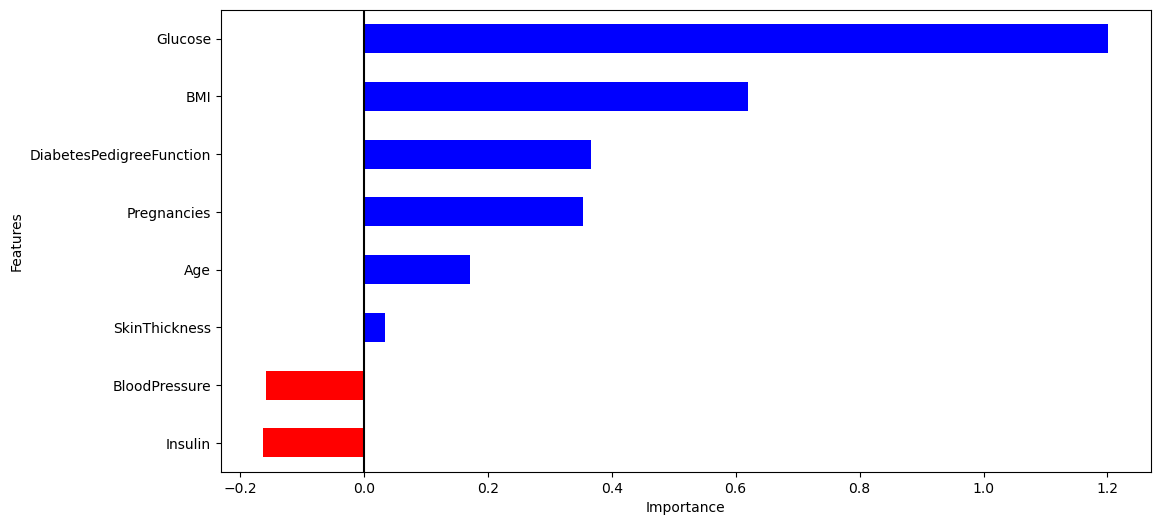

In [61]:
features.sort_values(by='importance', ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('features', inplace=True)
features['importance'].plot(kind='barh',
                            figsize=(12, 6),
                            color=features['positive'].map({True: 'blue',
                                                            False: 'red'}))
plt.xlabel('Importance')
plt.ylabel('Features')
plt.vlines(x=0, ymin=-1, ymax=9, colors='black')
plt.show()